Group Name: AG 19

Student Name (Student ID):

1. Lee Han Jian (A0248322J)

2. LI SHENGDONG (xxxxxxx)

3. ZHENG WENGRUI (A0250948W)

# Question 1

Consider the maze shown below. The Maze has 16 rows and 24 columns The objective is to find a shortest path from cell $S$ to cell $G$.


![Maze](https://github.com/Hanjianlee/IT5005/blob/main/assignment1/Maze_Assignment_1.jpg?raw=1)


The agent can take four actions in each cell: 'RIGHT', 'DOWN', 'UP', 'LEFT'.  

Each cell is represented as $(x,y)$, where $x$ indicates row number and $y$ indicates column number. Action 'UP' takes the agent from cell $(x,y)$ to $(x+1,y)$. Action 'DOWN' takes the agent from cell $(x,y)$ to $(x-1,y)$. Action 'RIGHT' takes the agent from cell $(x,y)$ to $(x,y+1)$. Action 'LEFT' takes the agent from cell $(x,y)$ to $(x,y-1)$. The triplet $(s,a,s')$  indicates that taking action $a$ at state $s$ leads to state $s'$. Actions 'LEFT' or 'RIGHT' cost 10 units for all $(s,a,s')$. Actions 'UP' or 'DOWN' cost 1 unit for all  $(s,a,s')$.  The agent cannot move into cells that are shaded. Assume that the agent knows the boundaries of the maze and has full observability. Consequently, at the bottom (row 0) and top (row 15), the agent will not take actions 'DOWN' and 'UP', respectively; at left (column 0) and right (column 23) columns, the agent will not take 'LEFT' and 'RIGHT' actions, respectively. Similalry, the agent will not take actions that lead to shaded region in the maze.

## **Q1.a: Class Maze(Problem)** [3 Marks]

Write a Maze class to create a model for this problem. You should not use an explicit state space model. The modelling should inherit the abstract class 'Problem' (given below). With the problem formulation, find the shortest path from S to G cell. Propose and implement multiple heuristics (at least two heuristics) for informed search algorithms. 

## **Q1.b: Analysis of the Algorithms** [7 Marks]

1. Solve the above Maze problem using the following algorithms

    a. Breadth-First Search

    b. Depth-First Search with Cycle-Check

    c. Iterative-Deepening Search with Cycle-Check

    d. Uniform-Cost Search

    e. A* Search 

    f. Greedy Best-first Search

    g. Any other variants for search algorithms that are not discussed in the class (bonus/optional question) 

2. Identify the number of nodes generated, number of nodes expanded, maximum frontier size, and path-cost for the above algorithms. 
 
3. Compare the performance of informed search algorithms with proposed heuristics. Identify the best performing heuristic and explain.
 
4. Draw a bar plot comparing the statistics of the algorithms and explain the results. 

Note 1: You must follow the problem formulation discussed in the class. A abstract class for Problem and Node definition is presented below. The search tree generation should follow the template discussed in the class (i.e., Node class, expand methods, etc.). 

Note 2: If you are borrowing a block of code (for example, helper functions or data structures, etc.) from AIMA4e repository, you have to acknowledge it in the code. 

Note 3: The code should be written in a single jupyter notebook file.

In [6]:
class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [43]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0, f=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost, f=f)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 
    def get_details(self):
        print(self.state,self.parent,self.action,self.path_cost)
    def expand(self, problem):
        state = self.state
        # number of child nodes of a node in Maze is at most 4, so we can simply use list instead of generator
        nodes = []
        for action in problem.actions():
            child_state = problem.result(state,action)
            # if this action is valid, i.e. the child state is not None
            if child_state and child_state is not None:
                # path_cost of the child node
                cost = self.path_cost + problem.action_cost(state, action, child_state)
                nodes.append(Node(child_state, self, action, cost))
        return nodes


In [118]:
from collections import deque
class Maze(Problem):
    #Your code goes here (16x24 Board)
    def __init__(self):
        self.initial = (8,10) # Start
        self.goal = (11,9) # Goal 
        self.expanded_nodes = []
        self.generated_nodes = []
        self.max_frontier_size = 0
        #self.heuristic = 1
        #self.up_cost = self.down_cost = 1
        #self.left_cost = self.right_cost = 10
        # Shaded regions
        self.shaded_regions = set()
        self.add_shadded_region(14,9)

        #Column 1 @ column 10
        self.add_shadded_region(13,10)
        self.add_shadded_region(12,10)
        self.add_shadded_region(11,10)
        self.add_shadded_region(10,10)

        #Column 2 @ column
        self.add_shadded_region(10,9)
        self.add_shadded_region(9,9)
        self.add_shadded_region(8,9)
        self.add_shadded_region(7,9)
        self.add_shadded_region(6,9)
 
        # SquareBox
        self.add_shadded_region(11,12)
        self.add_shadded_region(10,12)
        self.add_shadded_region(11,13)
        self.add_shadded_region(10,13)

        self.check = Node(self.initial,None,None,1)
        # Print start Node State
        if self.check.state in self.shaded_regions:
            print("Bad Start! :(")

    
    def add_shadded_region(self,r: int,c: int):
        if not isinstance(r,int) or not isinstance(c,int):
            raise AttributeError
        return self.shaded_regions.add((r,c))
    
    def actions(self):
        return ['DOWN','RIGHT','UP','LEFT']
    
    def action_cost(self, s, action, s1):
        if (action == 'UP') or (action == 'DOWN'):
            return 1
        else:  # if action is left or right move
            return 10

    def result(self, state:tuple, action: str): 
        if  action == 'UP':
            if state[0] == 15:
                return None 
            new_state = (state[0]+1,state[1])

        elif action == 'DOWN':
            if state[0] == 0 :
                return None     
            new_state = (state[0]-1,state[1])

        elif action == 'LEFT':
            if state[1] == 0:
                return None 
            new_state = (state[0],state[1]-1)

        elif action == 'RIGHT':
            if state[1] == 23:
                return None 
            new_state =(state[0],state[1]+1)
            
        # if new_state is in the shaded region
        if new_state in self.shaded_regions:
            return None
        return new_state

    def is_cycle(self,node):
        current_node = node 
        while current_node.parent is not None:
            if node.state == current_node.parent.state:
                return True
            current_node = current_node.parent
        return False


    # Receive a final result node of a search and print the total path from initial state to goal state
    def print_path_found(self, node):
        p = node
        path_list = []
        path_list.append(p.state)
        # while p has parent
        while p.parent:
            p = p.parent
            path_list.append(p.state)
        
        return path_list[::-1]
        
    
    # Manhattan distance heuristics
    # Since it's solution to relaxed Maze problem(No shaded region), it is consistent heuristic
    def h(self, state):
        return abs(state[0] - self.goal[0]) + abs(state[1] - self.goal[1])
    
    def h_with_cost(self, state):
        return abs(state[0] - self.goal[0])*1 + abs(state[1] - self.goal[1])*10
    
    def add_generated_nodes(self,node):
        self.generated_nodes.append(node)
        
    def add_expanded_nodes(self,node):
        self.expanded_nodes.append(node)
    
    def update_max_frontier_size(self,size):
        if size > self.max_frontier_size:
            self.max_frontier_size = size



In [134]:
import sys
def breadth_first_search(problem):
    print("[1. BFS]")
    node = Node(problem.initial)
    if problem.is_goal(node.state):
        return node
    frontier = deque([node]) # FIFO
    reached = {problem.initial}
    count = 0
    while len(frontier):
        count += 1
        node = frontier.popleft()
        # TODO: loop through expanded nodes ~~ 
        problem.add_expanded_nodes(node)
        for child_node in  node.expand(problem):
            if problem.is_goal(child_node.state): 
                return child_node
            if child_node.state not in reached:
                problem.add_generated_nodes(node)
                reached.add(child_node.state)
                frontier.append(child_node)
                problem.update_max_frontier_size(len(frontier))
    return 'Error'

def depth_first_search(problem):
    print("[2. DFS]")
    node = Node(problem.initial)
    if problem.is_goal(node.state):
        return node
    frontier = [node] # LIFO
    count = 0
    while len(frontier):
        node = frontier.pop()
        if problem.is_goal(node.state): 
            return node
        problem.add_expanded_nodes(node)
        if not problem.is_cycle(node):
            generated_nodes = node.expand(problem)
            frontier.extend(generated_nodes)
            [problem.add_generated_nodes(node) for node in generated_nodes]
            problem.update_max_frontier_size(len(frontier))
        count +=1
    return 'Error'

def depth_limited_search(problem, limit=50):
    def recursive_dls(node, problem, limit):
        if problem.is_goal(node.state):
            return node
        elif limit == 0:
            return 'cutoff'
        else:
            cutoff_occurred = False
            problem.add_expanded_nodes(problem)
            for child in node.expand(problem):
                if not problem.is_cycle(node):
                    problem.add_generated_nodes(child)
                    result = recursive_dls(child, problem, limit - 1)
                    if result == 'cutoff':
                        cutoff_occurred = True
                    elif result is not None:
                        return result
            return 'cutoff' if cutoff_occurred else None
    return recursive_dls(Node(problem.initial), problem, limit)



def iterative_deepening_search(problem):
    print("[3. IDS]")
    for depth in range(sys.maxsize):
        result = depth_limited_search(problem, depth)
        if result != 'cutoff':
            return result

bfs_problem = Maze()
res = breadth_first_search(Maze())
print(res.path_cost)
res =depth_first_search(Maze())
print(res)
res =iterative_deepening_search(Maze())
print(res)




[1. BFS]
39
[2. DFS]
<(11, 9)>
[3. IDS]
<(11, 9)>


In [132]:
from heapq import heappush, heappop
def best_first_search(problem,f):
    initial_node = Node(problem.initial, None, None, 0, problem.h(problem.initial))
    node = initial_node
    if problem.is_goal(node):
        return node
    frontier = []
    heappush(frontier,(node.path_cost,node)) # PQ
    reached = dict()
    reached[node.state] = 0
    while len(frontier) > 0:
        [cost,node] = heappop(frontier)
        if problem.is_goal(node.state):
            return node 
        problem.add_expanded_nodes(node)
        for child_node in node.expand(problem):
            child_state = child_node.state
            if child_state not in reached or f(child_node) < reached[child_state]:
                reached[child_state] = f(child_node)
                problem.add_generated_nodes(child_node)
                heappush(frontier,(child_node.path_cost,child_node))
                problem.update_max_frontier_size(len(frontier))
    return 'failure'

def uniform_cost_search(problem):
    print("[4. UCS]")
    return best_first_search(problem, lambda node: node.path_cost)

def greedy_best_first_search(problem):
    print("[5. GBFS]")
    return best_first_search(problem, lambda node: problem.h_with_cost(node.state))

def astar_search(problem):
    print("[6. A*]")
    return best_first_search(problem, lambda node: node.path_cost + problem.h_with_cost(node.state))

problem1 = Maze()
problem2 = Maze()
problem3 = Maze()
res = uniform_cost_search(problem1)
print(res.path_cost)
res = greedy_best_first_search(problem2)
print(res.path_cost)
res = astar_search(problem3)
print(res.path_cost)

[4. UCS]
39
[5. GBFS]
39
[6. A*]
39


In [108]:
INFTY = 18446744073709551615
def RBFS(problem):
    # using class variable to sum up the number of nodes generated and expanded
    number_of_generated = 0
    number_of_expanded = 0

    
    # override the expand method to initialize f attribute to all nodes generated
    def expand(node):
        ####################################### counting ################################################
        # RBFS.number_of_expanded += 1
        problem.add_expanded_nodes(node)
        #################################################################################################
        
        # call the Maze's expand function to generate child nodes without initialized f value
        nodes = node.expand(problem)
        res = []
        
        for n in nodes:
            # f = g + h
            n.f = n.path_cost + problem.h(n.state)
            # avoid cycles when generating nodes
            if not problem.is_cycle(n):
                problem.add_generated_nodes(node)
                res.append(n)
        
        return res
        
    # Use this method to start RBFS
    def search():
        print("[7. RBFS]")
        initial_node = Node(problem.initial, None, None, 0, problem.h(problem.initial))
        solution, _ = RBFS_search(initial_node, INFTY)
        return solution
    
    def RBFS_search(node, f_limit):
        
        if problem.is_goal(node.state):
            return node, 0
        successors = expand(node)
        
        if not successors: # if successor is empty
            return None, INFTY
        # update value when re-enter the node
        for s in successors:
            s.f = max(s.path_cost + problem.h(s.state), node.f)
        while True:
            best, alternative = find_best_two(successors)
            if best.f > f_limit:
                return None, best.f            
            # recursively call the RBFS search on the best child
            result, f = RBFS_search(best, min(f_limit, alternative) if alternative else f_limit)
            # update f value of best node when unwind
            best.f = f
            # if find the goal state in recursive call
            if result:
                return result, best.f
            
    # find best child node and second best f value in the successors
    def find_best_two(successors):
        successors.sort(key=lambda node: node.f)
        if len(successors) == 1:
            return successors[0], None
        else:
            return successors[0], successors[1].f
    return search()
        
problem = Maze()            
res = RBFS(problem)
print(problem.print_path_found(res))
print(f"Number of nodes expanded  in RBFS is {len(problem.expanded_nodes)}")
print(f"Number of nodes generated in RBFS is {len(problem.generated_nodes)}")

[7. RBFS]
[(7, 10), (6, 10), (5, 10), (5, 9), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (10, 8), (11, 8), (11, 9)]
Number of nodes expanded  in RBFS is 6989
Number of nodes generated in RBFS is 16186


[1. BFS]
[2. DFS]
[3. IDS]
[4. UCS]
[5. GBFS]
[6. A*]
[7. RBFS]
39 159 186 30
381 90 165 78
39 50222 132258 0
39 91 123 34
39 91 123 34
39 91 123 34
39 6989 16186 0


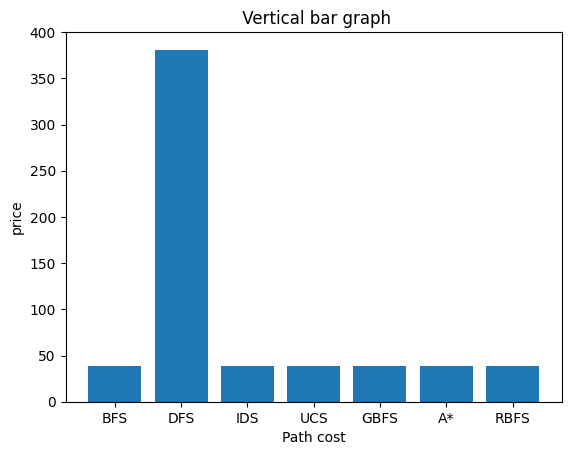

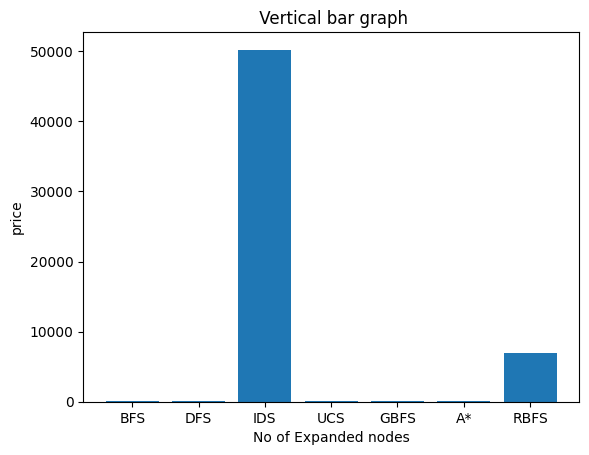

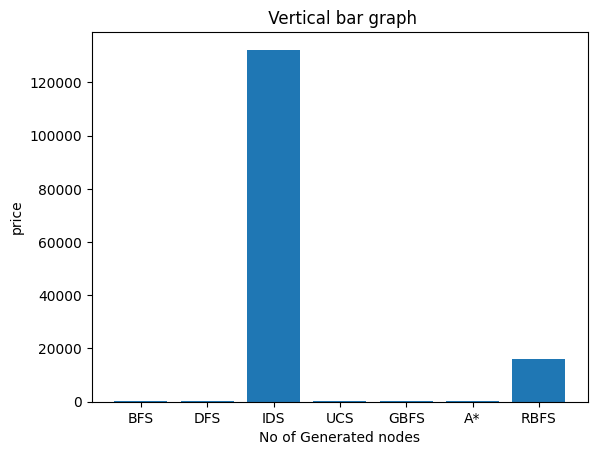

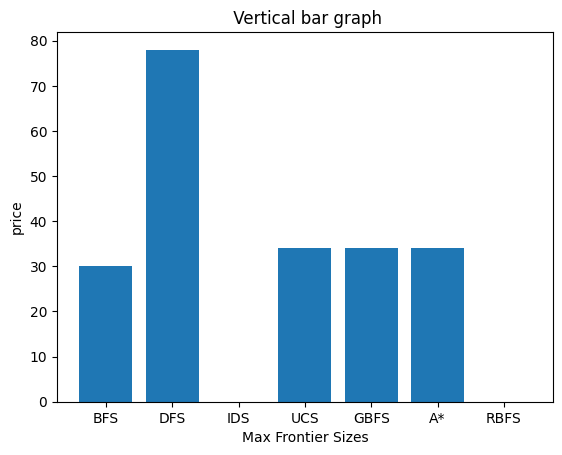

In [142]:
import matplotlib.pyplot as plt
def compare_search(
    Maze,
    algos=[
            breadth_first_search, 
            depth_first_search, 
            iterative_deepening_search,
            uniform_cost_search,
            greedy_best_first_search,
            astar_search,
            RBFS
        ]):
    problems = []
    for algo in algos:
        problem = Maze()
        problem.result = algo(problem)
        problem.total_path_cost = problem.result.path_cost
        problems.append(problem)
    path_cost_array = {"title": "Path cost", "data": []}
    expanded_nodes_array = {"title": "No of Expanded nodes", "data": []}
    generated_nodes_array = {"title": "No of Generated nodes", "data": []}
    max_frontier_size_array= {"title": "Max Frontier Sizes", "data": []}
    for problem in problems:
        path_cost_array["data"].append(problem.total_path_cost)
        expanded_nodes_array["data"].append(len(problem.expanded_nodes))
        generated_nodes_array["data"].append(len(problem.generated_nodes))
        max_frontier_size_array["data"].append(problem.max_frontier_size)
        print(problem.total_path_cost, len(problem.expanded_nodes), len(problem.generated_nodes), problem.max_frontier_size)

    for item in [path_cost_array,expanded_nodes_array,generated_nodes_array,max_frontier_size_array]:
        x=['BFS', 'DFS', 'IDS', 'UCS', 'GBFS','A*','RBFS']

        # giving the values against
        # each value at x axis
        y=item["data"]
        plt.bar(x, y)

        # setting x-label as pen sold
        plt.xlabel(item["title"])

        # setting y_label as price
        plt.ylabel("price")  
        plt.title(" Vertical bar graph")
        plt.show()

compare_search(Maze)